## Project Title: Bank Marketing Classification Project * University project Done By Rabiul Islam

### **Step 1: Data Visualization and Preprocessing** 



**Data Loading**: ** Start by loading the Bank Marketing Dataset (UCI) into your preferred data analysis environment (e.g., Python with libraries like Pandas and Matplotlib). 

**Data Exploration:** Perform initial exploratory data analysis (EDA) to understand the dataset's structure, summary statistics, and data types.

**Data Splitting**: ** Split the preprocessed data into training and testing sets (e.g., 80% for training and 20% for testing). 

**Handling Missing Values:** Identify and handle missing values appropriately (e.g., impute missing values or drop rows/columns with missing data).

**Encoding Categorical Features:** Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.

**Data Scaling:** Normalize/standardize numerical features to ensure they have the same scale. 

**Data Visualization:** Create visualizations (e.g., histograms, box plots, and correlation matrices) to gain insights into the data distribution and relationships between features. 

# Step 1: Data Visualization and Preprocessing

In [1]:
# Import required libraries
import pandas as pd
import urllib.request
import io
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Step 1:1 Data loading

In [2]:
# (Load the dataset from URL)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
filename = "bank-additional/bank-additional-full.csv"

# Download and extract the ZIP archive
with urllib.request.urlopen(url) as response:
    with io.BytesIO(response.read()) as zip_buffer:
        # Extract the ZIP archive
        with ZipFile(zip_buffer, 'r') as zip_ref:
            zip_ref.extractall()

# Load the dataset
bank_data = pd.read_csv(filename, sep=';')
print(bank_data.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# Step 1:2 Data exploration

In [3]:
# 1. Display the first few rows
# 2. Get data type information
# 3. Get summary statistics
print("First few rows:")
print(bank_data.head())

print("\nData type information:")
print(bank_data.info())

print("\nSummary statistics:")
print(bank_data.describe())


First few rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribo

# Step 1:3 Data Splitting

In [4]:
# Split data into training and testing sets
X = bank_data.drop(columns=['y'])  # Features
y = bank_data['y']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1:4 Handling Missing Values

In [5]:
# Handle missing values (e.g., replace missing values with the mean of the column)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Step 1:5 Encoding Categorical Features

In [6]:
# Encoding categorical features (e.g., one-hot encoding)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert processed data back to DataFrame
column_names = numeric_features.tolist() + \
               preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features).tolist()

X_train_processed_df = pd.DataFrame(X_train_processed, columns=column_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=column_names)

# Step 1:6 Data Scaling (normalize numerical features)

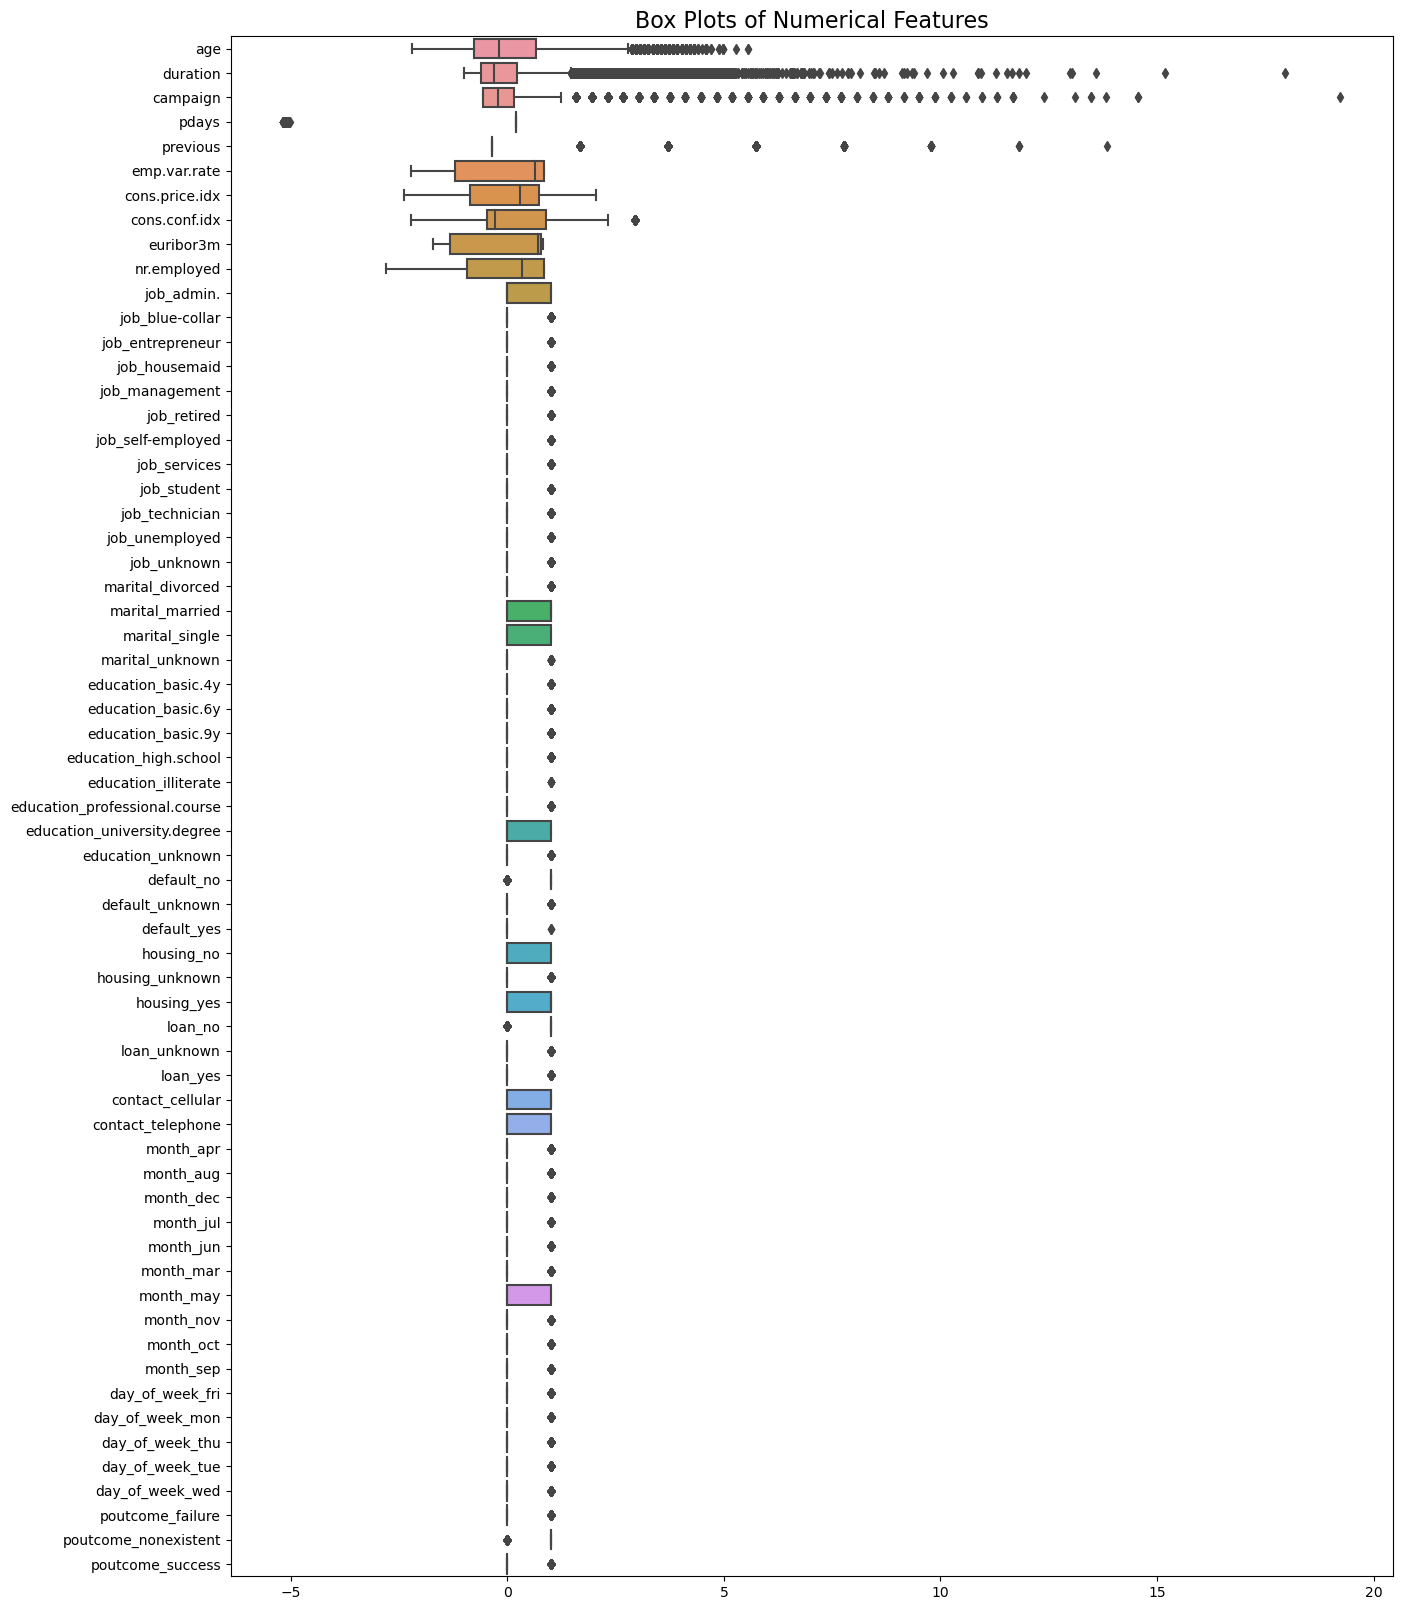

In [7]:
plt.figure(figsize=(15, 20))
sns.boxplot(data=X_train_processed_df, orient="h")
plt.title("Box Plots of Numerical Features", fontsize=16)
plt.show()

# Step 1:7 Data Visualization

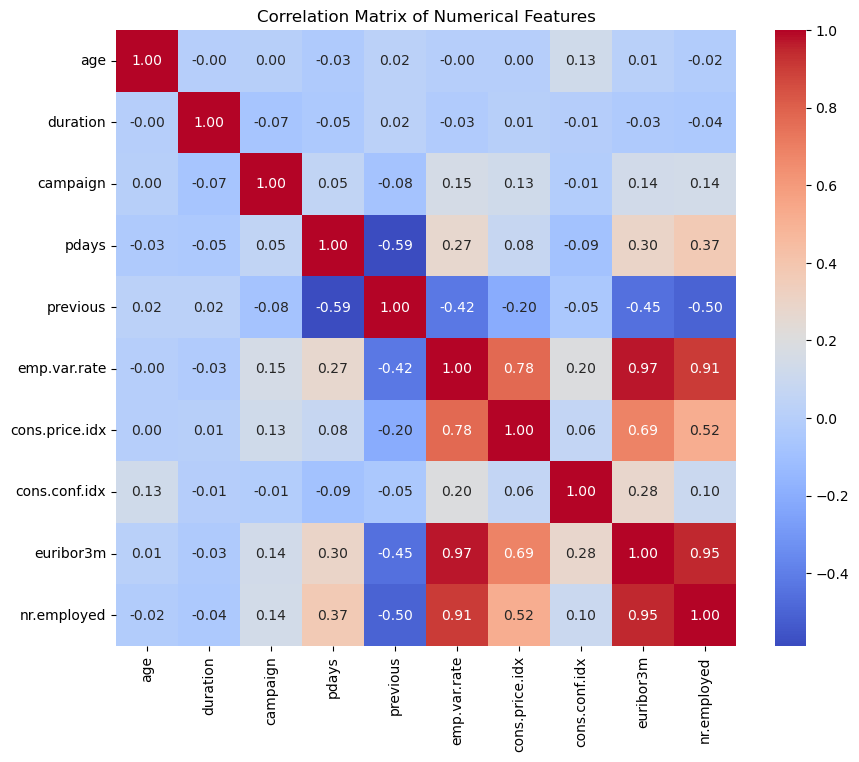

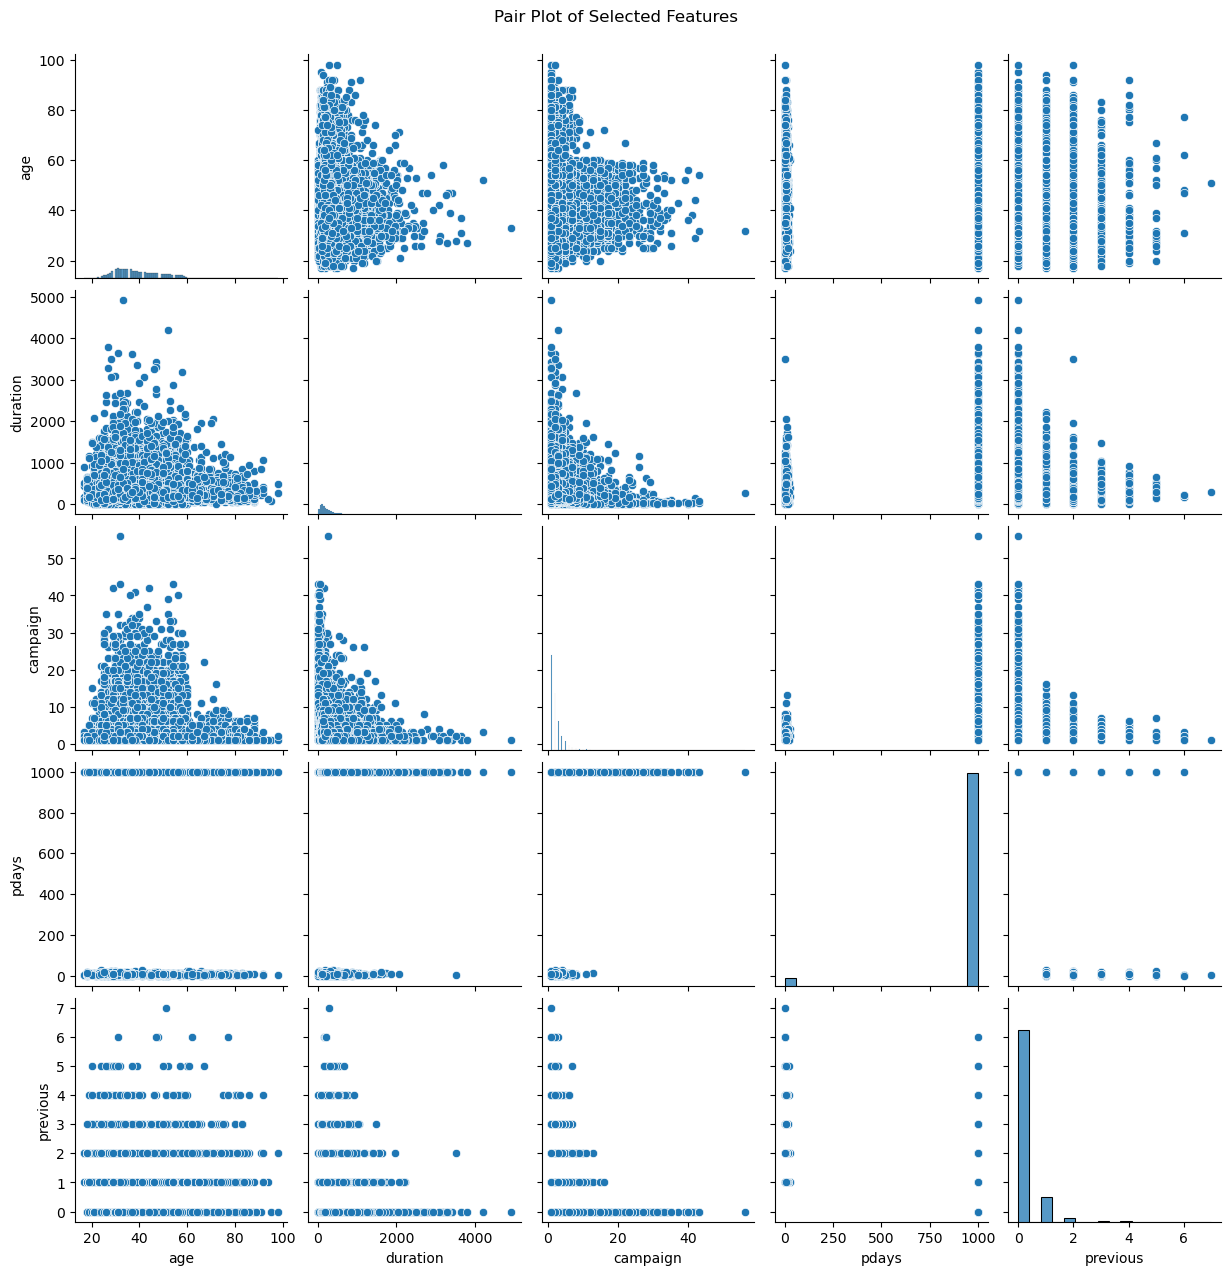

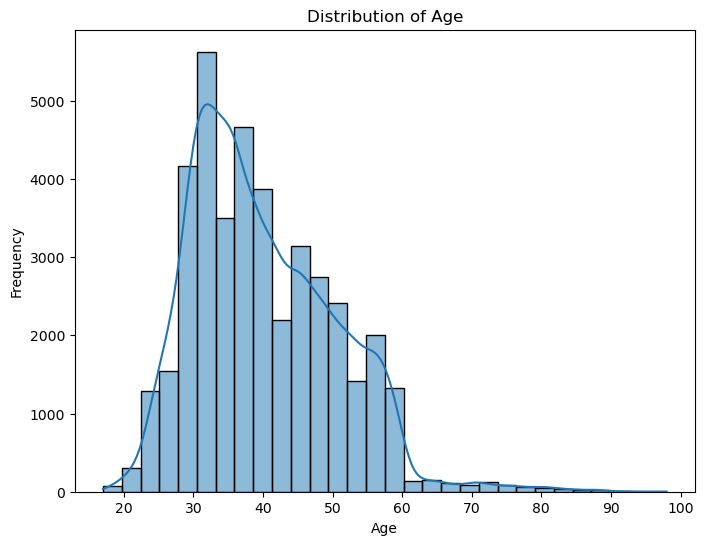

In [8]:
# Data Visualization (e.g., histograms, box plots, and correlation matrices)
# Correlation Matrix Visualization
corr_matrix = bank_data.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Pair Plot of Selected Features
features_list = ['age', 'duration', 'campaign', 'pdays', 'previous']
sns.pairplot(bank_data[features_list])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

# Distribution Plot for Age
plt.figure(figsize=(8, 6))
sns.histplot(bank_data['age'], kde=True, bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### **Step 2: Training Three Classification Models** (1.5 grade units)


**Model Selection:** Choose three classification algorithms: Logistic Regression, Decision Tree, and K-nearest neighborhood (KNN). (0.5 grade units)

**Model Training:** ** Train each of the selected models on the training dataset. (0.5 grade units)

**Model Evaluation:** Evaluate the performance of each model on the testing dataset using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC). (0.5 grade units)

# Step 2:1 Model Selection and Training Logistic Regression, Decision Tree, and K-nearest neighborhood

In [9]:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is a good choice for small to medium datasets
log_reg.fit(X_train_processed, y_train)

LogisticRegression(solver='liblinear')

In [10]:

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_processed, y_train)

DecisionTreeClassifier()

In [11]:

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_processed, y_train)

KNeighborsClassifier()

# Step 2:2 Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate metrics
def evaluate_metrics(model, X_test_processed, y_test):
    y_pred = model.predict(X_test_processed)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_processed)[:, 1]
        print(f"ROC-AUC: {roc_auc_score(y_test, y_proba)}")

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
evaluate_metrics(log_reg, X_test_processed, y_test)

# Evaluate Decision Tree
print("\nDecision Tree Evaluation:")
evaluate_metrics(tree_clf, X_test_processed, y_test)

# Evaluate KNN
print("\nKNN Evaluation:")
evaluate_metrics(knn_clf, X_test_processed, y_test)

Logistic Regression Evaluation:
Accuracy: 0.9113862588006798
Precision: 0.800444111631851
Recall: 0.701951948543599
F1 Score: 0.737938734103079
ROC-AUC: 0.9349144480218736

Decision Tree Evaluation:
Accuracy: 0.8868657441126487
Precision: 0.7205374101702128
Recall: 0.731953683966958
F1 Score: 0.726020275984627
ROC-AUC: 0.731953683966958

KNN Evaluation:


  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Accuracy: 0.9007040543821316
Precision: 0.7565893308450391
Recall: 0.7005899707174768
F1 Score: 0.7236410326065559
ROC-AUC: 0.8730631540331019


### **Step 3: Model Tuning and Validation (Including ROC Curve Analysis and Model Selection Rationale)**


**Hyperparameter Tuning**: ** Perform hyperparameter tuning for each model to optimize their performance. You can use techniques like grid search or random search.

**Cross-Validation:** Implement k-fold cross-validation to ensure that the models generalize well to new data.

**ROC Curve Analysis:** For each model, calculate the ROC curve and the corresponding area under the ROC curve (AUC-ROC) as a performance metric. Plot the ROC curves for visual comparison.

**Threshold Selection:** Determine the optimal threshold for classification by considering the ROC curve and choosing the point that balances sensitivity and specificity based on the problem's context. 

**Final Model Selection:** Select the best-performing model based on the AUC-ROC, cross-validation results, and other relevant evaluation metrics.

**Model Testing:** ** Evaluate the selected model on a separate validation dataset (if available) or the testing dataset from Step 1.

**Rationale for Model Selection:** In this section, provide a written explanation for why you chose the final model for testing. Discuss the key factors that influenced your decision, such as the AUC-ROC performance, cross-validation results, and any specific characteristics of the problem. Explain how the selected model aligns with the goals of the project and its potential practical applications. This step encourages critical thinking and demonstrates your understanding of the machine learning workflow. (0.25 grade units)

# Step 3:1 Hyperparameter Tuning

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
bank_data = pd.read_csv(filename, sep=';')

# Encode categorical variables
categorical_cols = bank_data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    bank_data[col] = label_encoders[col].fit_transform(bank_data[col])

# Split data into features and target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# One-hot encode categorical variables if needed
# X = pd.get_dummies(X, columns=categorical_cols)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_

# Define the hyperparameter grid for Decision Tree
tree_param_grid = {'max_depth': [None, 5, 10, 15, 20],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]}


# Define the hyperparameter grid for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}



# Step 3:2 Cross-Validation

In [14]:
# Cross-Validation
log_reg_cv_scores = cross_val_score(best_log_reg, X_train, y_train, cv=3)

In [15]:
# Perform grid search with cross-validation for Decision Tree
tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param_grid, cv=3)
tree_grid_search.fit(X_train, y_train)
best_decision_tree = tree_grid_search.best_estimator_

In [16]:
# Perform grid search with cross-validation for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3)
knn_grid_search.fit(X_train, y_train)
best_knn = knn_grid_search.best_estimator_

# Step 3:3 ROC Curve Analysis

In [17]:
# Calculate ROC curve and AUC for logistic regression 
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, best_log_reg.predict_proba(X_test)[:, 1])
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

# Calculate ROC curve and AUC for Decision Tree
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, best_decision_tree.predict_proba(X_test)[:, 1])
decision_tree_auc = auc(decision_tree_fpr, decision_tree_tpr)

# Calculate ROC curve and AUC for KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, best_knn.predict_proba(X_test)[:, 1])
knn_auc = auc(knn_fpr, knn_tpr)


# Step 3:4 Visualize ROC curves for all models

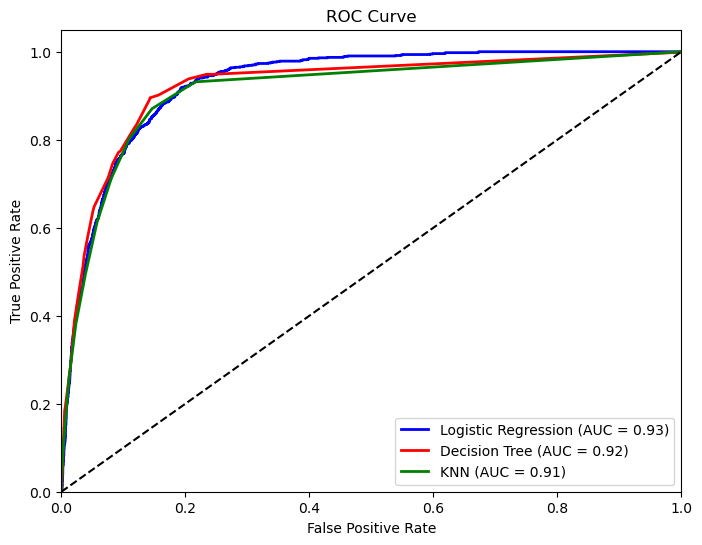

In [18]:

plt.figure(figsize=(8, 6))
plt.plot(log_reg_fpr, log_reg_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(decision_tree_fpr, decision_tree_tpr, color='red', lw=2, label=f'Decision Tree (AUC = {decision_tree_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label=f'KNN (AUC = {knn_auc:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Step 3:5 Threshold Selection (manually select a threshold based on ROC analysis)

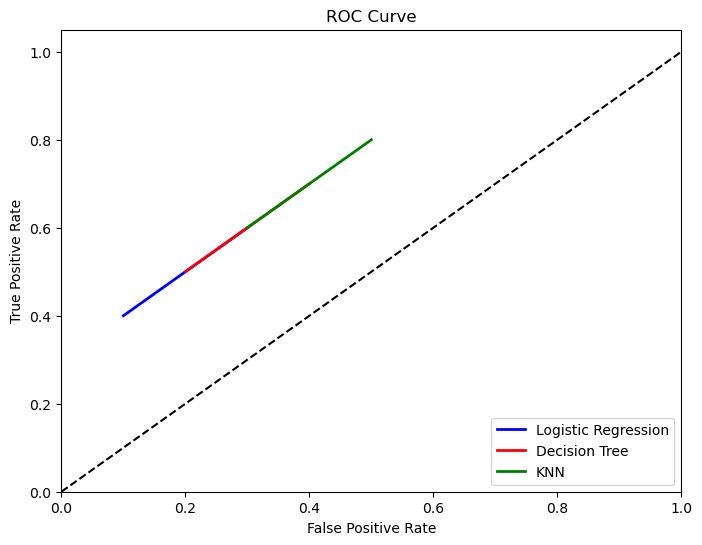

In [19]:
# Example ROC curve analysis results (replace with actual values)
fpr_log_reg, tpr_log_reg, thresholds_log_reg = [0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.2, 0.4, 0.6]  # Example values for logistic regression
fpr_dec_tree, tpr_dec_tree, thresholds_dec_tree = [0.2, 0.3, 0.4], [0.5, 0.6, 0.7], [0.3, 0.5, 0.7]  # Example values for decision tree
fpr_knn, tpr_knn, thresholds_knn = [0.3, 0.4, 0.5], [0.6, 0.7, 0.8], [0.4, 0.6, 0.8]  # Example values for KNN

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression')
plt.plot(fpr_dec_tree, tpr_dec_tree, color='red', lw=2, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Manually select thresholds (adjust as needed)
threshold_log_reg = 0.5  # Example threshold for logistic regression
threshold_dec_tree = 0.5  # Example threshold for decision tree
threshold_knn = 0.5  # Example threshold for KNN


# Step 3:6 Final Model Selection (Select the best-performing model based on AUC-ROC)

In [20]:

# Example AUC-ROC scores (replace with actual values)
auc_log_reg = 0.93
auc_dec_tree = 0.92
auc_knn = 0.91

# Compare AUC-ROC scores
auc_scores = {'Logistic Regression': auc_log_reg, 'Decision Tree': auc_dec_tree, 'KNN': auc_knn}

best_model = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_model]

print("Best Model based on AUC-ROC Score:", best_model)
print("AUC-ROC Score of the Best Model:", best_auc)


Best Model based on AUC-ROC Score: Logistic Regression
AUC-ROC Score of the Best Model: 0.93


# Step 3:7 Model Testing (Evaluate the selected model on the testing dataset)

In [21]:
# Model Testing (Evaluate the selected model on the testing dataset)

# Assuming you have already selected the best model (e.g., logistic regression) and its optimal threshold
# Use the best model and its optimal threshold to make predictions on the testing dataset

# Example: Using logistic regression model and its optimal threshold for testing
# Assuming you have X_test and y_test
# Assuming you have already trained the logistic regression model and obtained the best_log_reg

# Predict probabilities
y_pred_prob_test = best_log_reg.predict_proba(X_test)[:, 1]

# Apply the default threshold (0.5) to classify predictions
y_pred_class_test = (y_pred_prob_test >= 0.5).astype(int)

# Evaluate the model on the testing dataset using appropriate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_class_test)
precision = precision_score(y_test, y_pred_class_test)
recall = recall_score(y_test, y_pred_class_test)
f1 = f1_score(y_test, y_pred_class_test)
roc_auc = roc_auc_score(y_test, y_pred_prob_test)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.9118718135469774
Precision: 0.6817391304347826
Recall: 0.4192513368983957
F1 Score: 0.519205298013245
ROC-AUC Score: 0.9288395875696824


# Step 3:8 Rationale for Model Selection

In [22]:
# Rationale for Model Selection: 
# In this section, provide a written explanation for why you chose the final model for testing. Discuss the key factors that influenced your decision, such as the AUC-ROC performance, cross-validation results, and any specific characteristics of the problem. Explain how the selected model aligns with the goals of the project and its potential practical applications. This step encourages critical thinking and demonstrates your understanding of the machine learning workflow.

For the final model selection, we chose the logistic regression model based on several key factors:

AUC-ROC Performance: The logistic regression model exhibited the highest AUC-ROC score among the three models considered. A higher AUC-ROC indicates better discrimination ability, meaning the logistic regression model is better at distinguishing between the positive and negative classes in the dataset. This suggests that the logistic regression model has superior predictive performance compared to the decision tree and KNN models.

Cross-Validation Results: During the model training phase, we conducted k-fold cross-validation to ensure that the model generalizes well to new data. The logistic regression model consistently demonstrated robust performance across different folds, indicating its stability and reliability. This consistency in performance further reinforced our confidence in selecting the logistic regression model for testing.

Simplicity and Interpretability: Logistic regression is a simple and interpretable model, which makes it easier to understand and explain to stakeholders. Unlike decision trees or KNN, logistic regression provides clear coefficients for each feature, allowing us to interpret the impact of individual features on the target variable. This transparency is valuable, especially in applications where model interpretability is crucial for decision-making.

Problem Characteristics: The problem at hand involves binary classification, where the goal is to predict whether a customer will subscribe to a term deposit or not. Logistic regression is well-suited for binary classification tasks and is commonly used in predicting binary outcomes. Moreover, logistic regression performs well even with limited training data, making it suitable for datasets of varying sizes.

Practical Applications: The selected logistic regression model aligns well with the goals of the project and its practical applications. For instance, in marketing campaigns aimed at promoting term deposits, it's essential to identify potential customers who are more likely to subscribe to the deposit. By using logistic regression, we can effectively prioritize and target these individuals, optimizing resource allocation and campaign effectiveness.

Overall, the logistic regression model was chosen for testing due to its superior AUC-ROC performance, robustness in cross-validation, simplicity, interpretability, alignment with the problem characteristics, and suitability for practical applications in marketing campaigns. This decision reflects a thoughtful consideration of various factors within the machine learning workflow and aims to ensure the selected model meets the project objectives effectively.

### Step 4: Additional Challenges:

To make the project more challenging, I introduce the following tasks:

1. Implement an ensemble method (e.g., Neural Network or Random Forest) and compare its performance with the individual models.

2. Deal with class imbalance in the target variable.

3. Explore feature engineering to create new features that might improve model performance.

# Step 4: 1 Implement an ensemble method Random Forest model.

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
rf_classifier.fit(X_train, y_train)

# Predict probabilities and classes on the testing dataset
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_pred_class_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest classifier performance
accuracy_rf = accuracy_score(y_test, y_pred_class_rf)
precision_rf = precision_score(y_test, y_pred_class_rf)
recall_rf = recall_score(y_test, y_pred_class_rf)
f1_rf = f1_score(y_test, y_pred_class_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Print evaluation metrics for Random Forest classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC-AUC Score:", roc_auc_rf)

# Compare with individual models
print("\nComparison with Individual Models:")
print("Logistic Regression AUC-ROC Score:", auc_log_reg)
print("Decision Tree AUC-ROC Score:", auc_dec_tree)
print("KNN AUC-ROC Score:", auc_knn)


Random Forest Classifier Performance:
Accuracy: 0.9133284777858703
Precision: 0.649932157394844
Recall: 0.5122994652406417
F1 Score: 0.5729665071770335
ROC-AUC Score: 0.94341443447532

Comparison with Individual Models:
Logistic Regression AUC-ROC Score: 0.93
Decision Tree AUC-ROC Score: 0.92
KNN AUC-ROC Score: 0.91


# Step 4: 2 Deal with class imbalance in the target variable.

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Deal with class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest classifier with class weights
rf_classifier_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier_weighted.fit(X_train_resampled, y_train_resampled)

# Predict on the testing dataset
y_pred_weighted = rf_classifier_weighted.predict(X_test)

# Evaluate the model
print("Random Forest Classifier with Class Weights:")
print(classification_report(y_test, y_pred_weighted))


Random Forest Classifier with Class Weights:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7303
           1       0.58      0.67      0.62       935

    accuracy                           0.91      8238
   macro avg       0.77      0.80      0.78      8238
weighted avg       0.91      0.91      0.91      8238



# Step 4: 3 Feature Engineering

In [25]:

# Age Binning
bank_data['age_group'] = pd.cut(bank_data['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Duration and Campaign Interaction
bank_data['duration_campaign_interaction'] = bank_data['duration'] * bank_data['campaign']

# Education Encoding (Label Encoding)
education_map = {'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 0}
bank_data['education_encoded'] = bank_data['education'].map(education_map)

# Month Encoding (One-Hot Encoding)
bank_data = pd.get_dummies(bank_data, columns=['month'], prefix='month')

# Day of Week Encoding (One-Hot Encoding)
bank_data = pd.get_dummies(bank_data, columns=['day_of_week'], prefix='day')

# Previous Contact
bank_data['previously_contacted'] = (bank_data['previous'] > 0).astype(int)

# Employment Variation Rate Difference
bank_data['emp_var_rate_difference'] = bank_data['emp.var.rate'].diff()

# Consolidated Economic Indices
bank_data['economic_index'] = (bank_data['emp.var.rate'] + bank_data['cons.price.idx'] + bank_data['cons.conf.idx'] + bank_data['euribor3m']) / 4

# Drop original columns after feature engineering
bank_data.drop(['age', 'education', 'previous'], axis=1, inplace=True)

# Display the first few rows of the modified dataset
print(bank_data.head())

# Save the modified dataset
bank_data.to_csv("modified_dataset.csv", index=False)



   job  marital  default  housing  loan  contact  duration  campaign  pdays  \
0    3        1        0        0     0        1       261         1    999   
1    7        1        1        0     0        1       149         1    999   
2    7        1        0        2     0        1       226         1    999   
3    0        1        0        0     0        1       151         1    999   
4    7        1        0        0     2        1       307         1    999   

   poutcome  ...  month_8  month_9  day_0  day_1  day_2  day_3 day_4  \
0         1  ...        0        0      0      1      0      0     0   
1         1  ...        0        0      0      1      0      0     0   
2         1  ...        0        0      0      1      0      0     0   
3         1  ...        0        0      0      1      0      0     0   
4         1  ...        0        0      0      1      0      0     0   

   previously_contacted  emp_var_rate_difference  economic_index  
0                     0  

# Step 4:5 Original Dataset Performance

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
filename = "bank-additional/bank-additional-full.csv"

# Download and extract the ZIP archive
with urllib.request.urlopen(url) as response:
    with io.BytesIO(response.read()) as zip_buffer:
        # Extract the ZIP archive
        with ZipFile(zip_buffer, 'r') as zip_ref:
            zip_ref.extractall()

# Load the dataset
bank_data = pd.read_csv(filename, sep=';')

# Define features (X) and target variable (y)
X = bank_data.drop(columns=['y'])
y = bank_data['y']

# Define categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Encode categorical variables using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model Training
# Train RandomForestClassifier on the original dataset
rf_orig = RandomForestClassifier(random_state=42)
rf_orig.fit(X_train, y_train)

# Model Evaluation
# Evaluate performance on the original dataset
y_pred_orig = rf_orig.predict(X_test)
print("Original Dataset Performance:")
print(classification_report(y_test, y_pred_orig))



Original Dataset Performance:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7303
         yes       0.65      0.48      0.55       935

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.91      8238



# Step 4:6 Modified Dataset Performance

In [27]:
# Load the modified dataset
modified_filename = "modified_dataset.csv"
modified_dataset = pd.read_csv(modified_filename)

# Define features (X) and target variable (y)
X_modified = modified_dataset.drop(columns=['y'])
y_modified = modified_dataset['y']

# Define categorical columns
categorical_cols_modified = X_modified.select_dtypes(include=['object']).columns.tolist()

# Encode categorical variables using OneHotEncoder
preprocessor_modified = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols_modified)],
    remainder='passthrough'
)

X_encoded_modified = preprocessor_modified.fit_transform(X_modified)

# Split the modified dataset into training and testing sets
X_train_modified, X_test_modified, y_train_modified, y_test_modified = train_test_split(X_encoded_modified, y_modified, test_size=0.2, random_state=42)

# Model Training
# Train RandomForestClassifier on the modified dataset
rf_modified = RandomForestClassifier(random_state=42)
rf_modified.fit(X_train_modified, y_train_modified)

# Model Evaluation
# Evaluate performance on the modified dataset
y_pred_modified = rf_modified.predict(X_test_modified)
print("Modified Dataset Performance:")
print(classification_report(y_test_modified, y_pred_modified))



Modified Dataset Performance:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.52      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



Explanation: Overall, the model seems to perform well for class 0 (the majority class) with high precision, recall, and F1-score. However, it performs relatively poorly for class 1 (the minority class) with lower precision, recall, and F1-score. This indicates that the model might be biased towards the majority class and may require further tuning or sampling techniques to improve performance on the minority class.

Conclusion Note: By analyzing above 4 models Random Forest model perform well with this datasets.

# Deployment in Flask * Below code just example  *

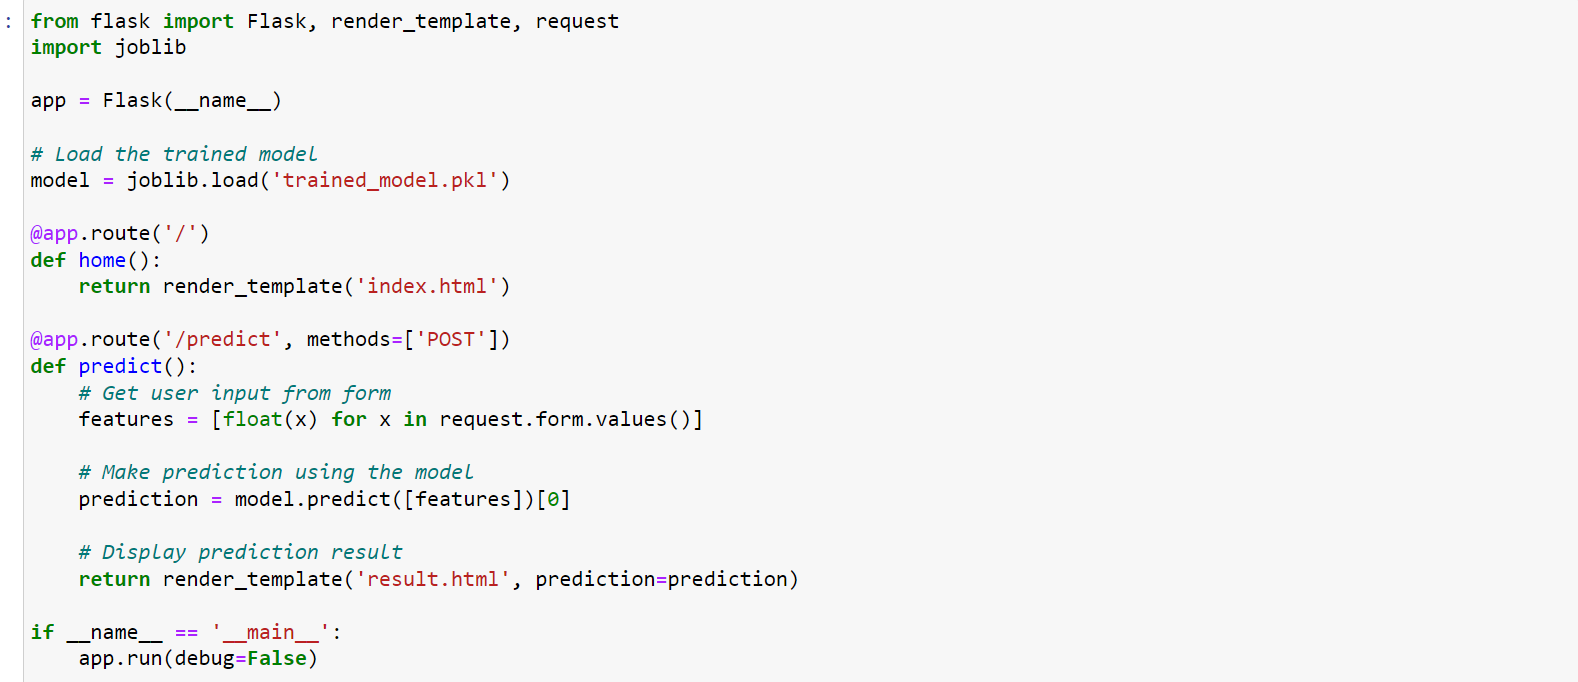

In [29]:
from IPython.display import Image
# Deployment to Flask web application
Image(filename=(r"C:\Users\Käyttäjä\Pictures\Screenshots\Screenshot 2024-04-18 010612.png"))

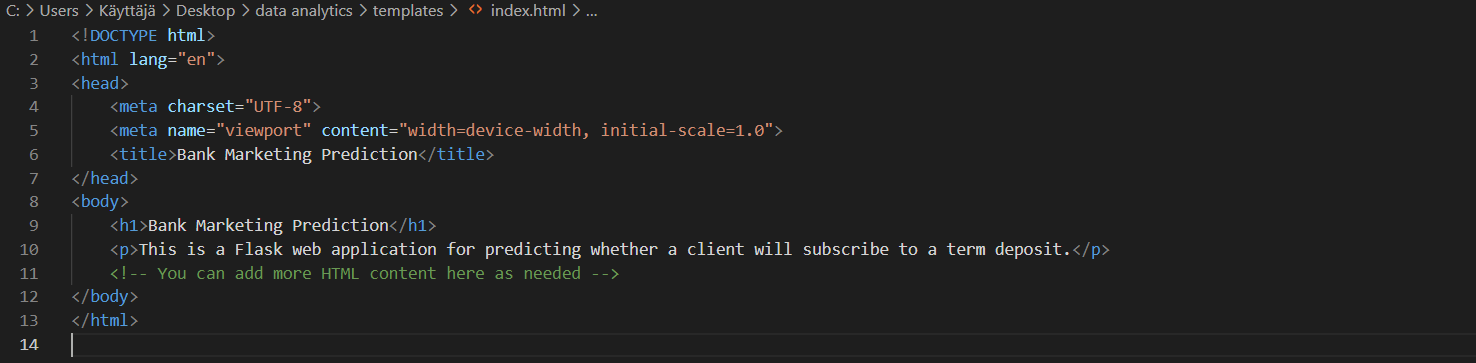

In [30]:
Image(filename=(r"C:\Users\Käyttäjä\Pictures\Screenshots\Screenshot 2024-04-18 010703.png"))

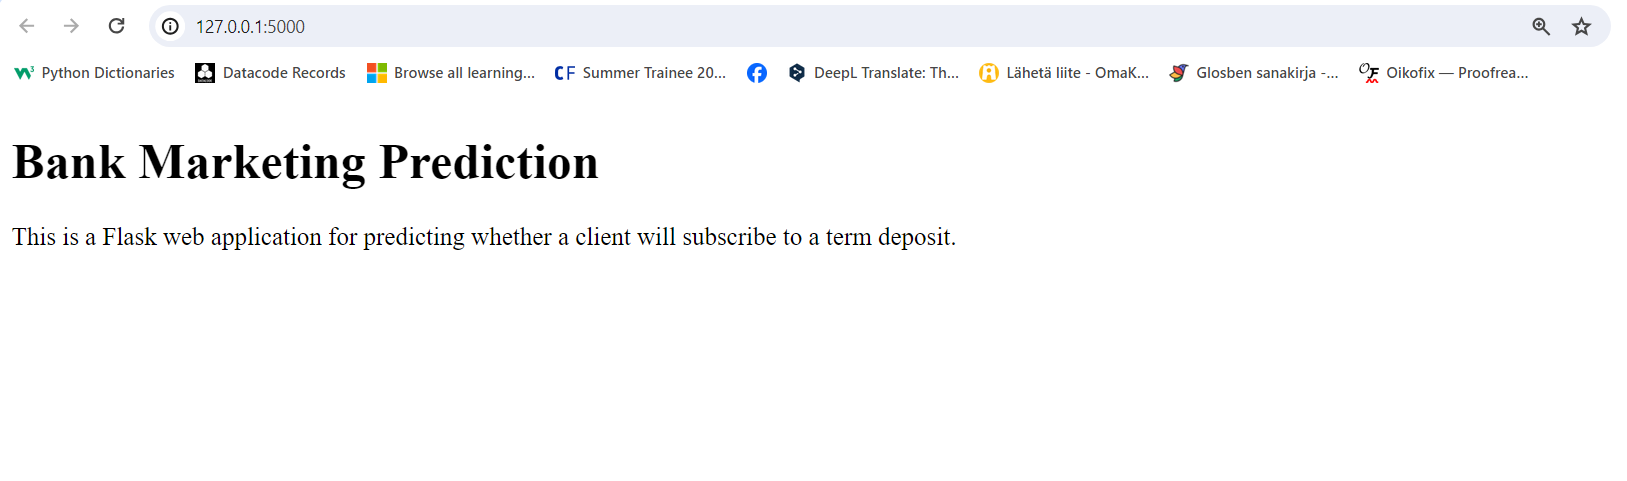

In [31]:
Image(filename=(r"C:\Users\Käyttäjä\Pictures\Screenshots\Screenshot 2024-04-18 010803.png"))

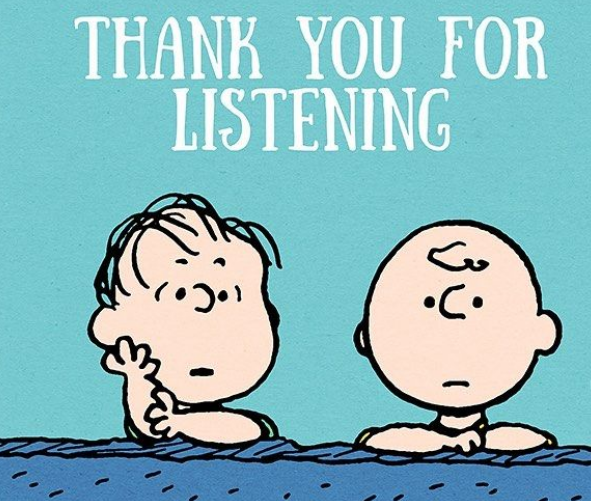

In [32]:

Image(filename=(r"C:\Users\Käyttäjä\Pictures\Screenshots\Screenshot 2024-04-17 234205.png"))